In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [77]:
# Loading the saved LSTM model
rnn_lstm_model = load_model('rnn_lstm_model.keras')

In [84]:
# Loading the test data samples
test_data = pd.read_csv(r'C:\Users\yousuf\source\repos\IndividualProject_Mr.PechThesisDataset&Model\ThesisModel\THESIS_TEST_FOLDER_FOR_DEMO\TestData_Today.csv')
test_data.head(5)

,Label,34928,35048,35167,35286,35405,35524,35644,35763,35882,...,43869,43988,44107,44227,44346,44465,44584,44703,44823,44942
0,1,16,54,41,42,48,40,63,31,66,...,86,57,86,46,82,66,79,61,80,57
1,1,37,33,38,41,40,62,45,50,36,...,69,86,82,66,70,77,79,62,77,64
2,1,94,65,79,70,74,89,67,101,79,...,155,99,135,105,112,94,95,100,95,101
3,1,40,76,56,68,80,52,90,51,103,...,123,155,120,124,98,114,103,108,106,103
4,1,75,45,67,67,58,75,52,81,45,...,141,79,123,74,110,69,84,66,89,76


In [85]:
# Extract features and labels from test data
X_test = test_data.iloc[:, 1:].values  # all features except 1st column
y_test = test_data.iloc[:, 0].values.astype(int)   #all labels from 1st column

print(X_test)

[[ 16  54  41 ...  61  80  57]
 [ 37  33  38 ...  62  77  64]
 [ 94  65  79 ... 100  95 101]
 ...
 [ 48  54  56 ...  78  75  76]
 [ 93  68  79 ... 101 117  86]
 [ 69  91  65 ... 111 126  90]]


In [86]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [87]:
# Distribution of labels
print("\nDistribution of labels:")
print(pd.Series(y_test).value_counts())


Distribution of labels:
1    100
Name: count, dtype: int64


In [88]:
# Reshaping the feature set to match model's input shape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [89]:
# Prediction time calculation
start_time = time.time()
y_pred = rnn_lstm_model.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time
print(f"Prediction Time: {prediction_time: .4f} seconds")


# Evaluation time calculation
start_time = time.time()
test_loss, test_acc = rnn_lstm_model.evaluate(X_test, y_test)
end_time = time.time()

evaluation_time = end_time - start_time
print(f"Evaluation Time: {evaluation_time: .4f} seconds")


#Evaluation of saved model with new data
test_loss, test_acc = rnn_lstm_model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Predictions making on test data
y_pred = rnn_lstm_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print("\nConfusion Matrix for Testing Set:")
print(test_conf_matrix)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction Time:  0.1952 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3507 - loss: 2.4612
Evaluation Time:  0.2062 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3507 - loss: 2.4612
Test accuracy: 0.3300
Test loss: 2.4862
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Confusion Matrix for Testing Set:
[[67 33]
 [ 0  0]]


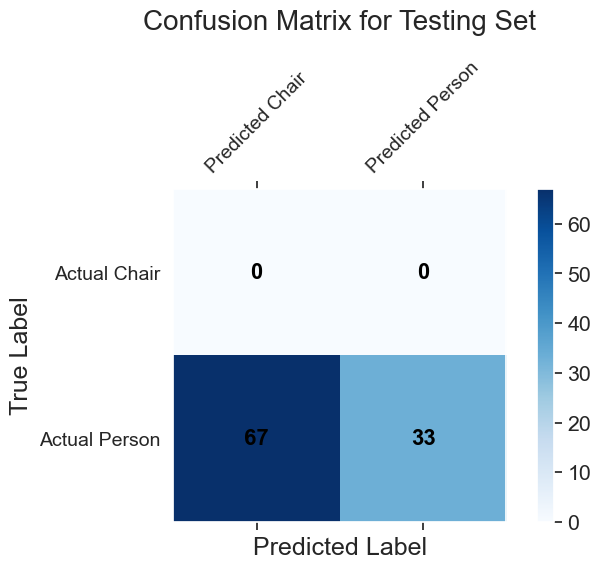

In [90]:
test_conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plotting CM
fig, ax = plt.subplots(figsize=(8, 6))  # Increase the figure size
cax = ax.matshow(test_conf_matrix, cmap='Blues')

plt.colorbar(cax)
for (i, j), val in np.ndenumerate(test_conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=16, fontweight='bold')

# Axis labels
ax.set_xticks(np.arange(len(['Predicted Chair', 'Predicted Person'])))
ax.set_yticks(np.arange(len(['Actual Chair', 'Actual Person'])))
ax.set_xticklabels(['Predicted Chair', 'Predicted Person'], fontsize=14)
ax.set_yticklabels(['Actual Chair', 'Actual Person'], fontsize=14)

# Gris lines
ax.grid(False)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.title('Confusion Matrix for Testing Set', fontsize=20, pad=20)

# Adjust the layout
plt.tight_layout()
plt.show()

